In [134]:

import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

### Univariate Analysis🫀

In [2]:
ucl = pd.read_excel('UCL_playerstats_orig.xlsx')

#### 1. Top 10 Sulmuesit

In [3]:
top_attackers = ucl[['Player','Team','Goals','Assists','Minutes_played']].sort_values(by='Goals', ascending=False).head(10).reset_index(drop=True)

In [4]:
print(top_attackers)

             Player             Team  Goals  Assists  Minutes_played
0          Raphinha        Barcelona     13        9            1225
1          Guirassy     BVB Dortmund     13        4            1084
2        Harry Kane    Bayern Munich     11        2            1120
3       Lewandowski        Barcelona     11        0             985
4  Lautaro Martinez            Inter      9        0             857
5       Vinicius Jr      Real Madrid      8        3            1104
6           Dembele         Paris SG      8        6            1163
7           Haaland  Manchester City      8        0             771
8          Pavlidis          Benfica      7        3             905
9     Kylian Mbappe      Real Madrid      7        2            1132


#### 2. Boxplot: Rating sipas Position

In [6]:
fig_box = px.box(
    ucl,
    x="Position",
    y="Rating",
    color="Position",
    title="Player Rating Distribution by Position",
    labels={"Rating": "Player Rating", "Position": "Position"}
)
fig_box.update_layout(
    xaxis_tickangle=-45,
    showlegend=False,

)

fig_box.show()

#### 3. Scatterplot: Market Value vs Player Rating

In [7]:
fig_trend = px.scatter(
    ucl,
    x="Value10^6",
    y="Rating",
    title="Market Value vs Player Rating (with Trendline)",
    labels={"Value10^6": "Market Value 10^6€", "Rating": "Player Rating"}, # Ordinary Least Squares
)

fig_trend.show()

#### 4. The youngest players in the Champions League and their ratings

In [18]:
Youngest_Players = ucl.sort_values(by='Age', ascending=True).head(10)

Youngest_Players[['Player','Age','Rating']].sort_values(by='Age', ascending=True)


,Player,Age,Rating
15,Yamal,17,7.92
81,Quenda,18,6.90
93,Desire Doue,19,7.39
21,Rico Lewis,20,6.94
119,Lamine Camara,20,7.11
90,Kenan Yildiz,20,6.97
190,Milambo,20,7.13
175,Joao Neves,20,7.53
164,Gittens,20,7.00
120,Savinho,21,6.90


#### 5. Countries with the most goals in Champions League

In [74]:
goals_by_country = ucl.groupby("Nationality")["Goals"].sum().reset_index()

#  Rendit sipas numrit të golave
goals_by_country = goals_by_country.sort_values("Goals", ascending=False).head(20)


In [76]:
fig = px.bar(
    goals_by_country,
    x="Nationality",
    y="Goals",
    title="Countries Hits Number of Goals in Champions League 2025",
    color_discrete_sequence=["orange"]
)

fig.update_layout(xaxis_title="", yaxis_title="Goals")
fig.show()


#### 6. (Treemap): Teams in the Champions League

In [77]:
# Calculate the total number of teams in the dataet using groupby and nunique
total_teams_ucl = ucl.groupby('Team')['Team'].nunique().count()
total_teams_ucl

np.int64(31)

In [78]:
# Create a treemap
fig_treemap = px.treemap(
    ucl,
    path=['Team'],

    title='Teams in the Champions League 2025 - Tree Map'
)
fig_treemap.update_layout(margin=dict(l=0, r=0, b=0, t=30))
fig_treemap.show()

#### 7 (FunnelChart). top 5 Teams with the best records of tackles won

In [71]:
    # Get the top 5 Teams with the best records of tackles won
top_teams_tackles = ucl.groupby('Team')['Tackles_Won'].sum().nlargest(5).reset_index()
top_teams_tackles

,Team,Tackles_Won
0,Paris SG,97.0
1,Inter,80.0
2,Benfica,63.0
3,Real Madrid,63.0
4,Barcelona,62.0


In [74]:

fig_funnel = px.funnel(top_teams_tackles,x='Tackles_Won',y='Team',title='Top 5 Teams with the Most Tackles Won in Champions League 2025',orientation='h',labels={'Tackles_Won':'Tackles Won'})
fig_funnel.show()


#### 8. (Heatmap): Mean Total Goals per Phase_Tier

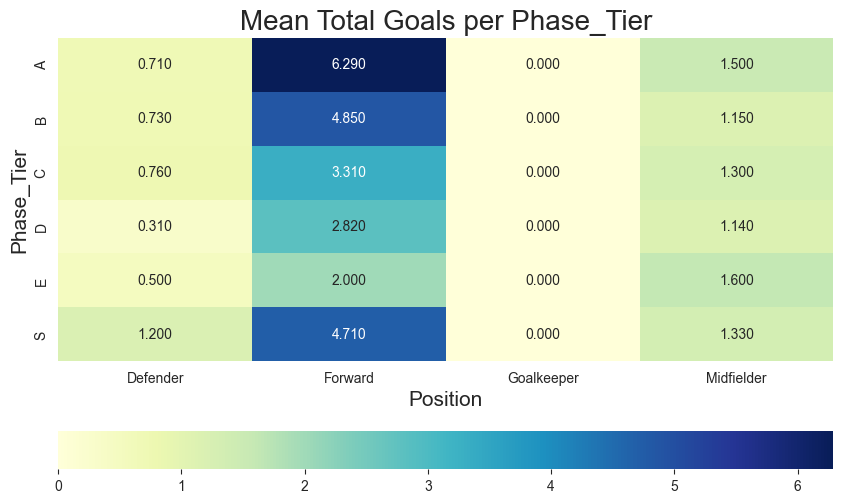

In [124]:
# Mean Total Goals per Phase_Tier
plt.figure(figsize=(10,6))
sns.heatmap(ucl.pivot_table(index='Phase_Tier', columns='Position', values='Goals', aggfunc='mean').round(2), annot=True, fmt=".3f", cmap="YlGnBu", cbar=True,
            cbar_kws={'orientation': 'horizontal'})
plt.title('Mean Total Goals per Phase_Tier', fontsize=20)
plt.xlabel('Position', fontsize=15)
plt.ylabel('Phase_Tier', fontsize=15)
plt.show()

#### 9. (Pie Chart): Total Players by Age Groups

In [79]:
def age_group(age):
    if age <= 20:
        return '17 & 20'
    elif 20 < age <= 25:
        return '20 & 25'
    elif 25 < age <= 30:
        return '25 & 32'
    else:
        return '32'

In [80]:
ucl_group_age = ucl['Age'].apply(age_group)
age_group_counts = ucl_group_age.value_counts().reset_index()

In [81]:
age_group_counts.columns = ['Age Group', 'Count']

# Pie chart
fig = px.pie(
    age_group_counts,
    names='Age Group',
    values='Count',
    title='Total Players by Age Groups',
    color_discrete_sequence=px.colors.qualitative.Bold
)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

#### 10 (Bar Chart). Highest Values Teams in Champions League 2025

In [82]:
team_counts = ucl['Team'].value_counts()
valid_teams = team_counts[team_counts >= 8].index

winner_team_probabilities = ucl[ucl['Team'].isin(valid_teams)].groupby('Team').head(8)

balanced_team_counts = winner_team_probabilities['Team'].value_counts()

In [83]:
balanced_team_counts

Team
Inter              8
Barcelona          8
Liverpool FC       8
Real Madrid        8
Arsenal FC         8
Benfica            8
Atletico Madrid    8
Paris SG           8
PSV Eindhoven      8
BVB Dortmund       8
Aston Villa        8
Atalanta BC        8
Bayern Munich      8
Name: count, dtype: int64

In [84]:
winner_team_probabilities = (
    ucl[ucl['Team'].isin(valid_teams)]
    .sort_values(by='Value10^6', ascending=False)
    .groupby('Team')
    .head(8)
    .groupby('Team')['Value10^6']
    .sum()
    .sort_values(ascending=False)
)

winner_team_probabilities

Team
Real Madrid        945.0
Arsenal FC         740.0
Barcelona          600.0
Bayern Munich      522.0
Liverpool FC       505.0
Inter              503.0
Paris SG           490.0
Aston Villa        281.0
Atletico Madrid    260.0
BVB Dortmund       256.0
Atalanta BC        220.0
PSV Eindhoven      192.0
Benfica            163.0
Name: Value10^6, dtype: float64

In [95]:
type(winner_team_probabilities)

pandas.core.series.Series

In [96]:
fig = px.bar(
    winner_team_probabilities,
    x=winner_team_probabilities.index,
    y=winner_team_probabilities.values,
    title='Highest Values Teams in Champions League 2025',
    labels={'x': 'Team', 'y': 'Value10^6'},
)

fig.update_layout(xaxis_title='Team', yaxis_title='Value10^6')
fig.show()

#### 11 (Bar Chart). Top Dribblers in Champions League 2025

In [97]:
top_dribblers = ucl.sort_values(by='Dribbles', ascending=False).head(20)

In [98]:
top_dribblers

,PlayerID,Player,Position,Age,Nationality,Team,Competitions,Phase,Phase_Tier,Value10^6,...,Balls_recovered,Tackles_Won,Tackles_Lost,Saves,Goals_Conceded,Clean_Sheets,MOTM_Awards,Minutes_played,Match_played,DNP
15,16,Yamal,Forward,17,Spain,Barcelona,La Liga,Semi_finals,A,180.0,...,19,5,5,0,0,0,1,1101,13,1
37,38,Vinicius Jr,Forward,24,Brazil,Real Madrid,La Liga,Quarter_finals,B,200.0,...,20,3,11,0,0,0,3,1104,12,2
84,85,Rafael Leao,Forward,25,Portugal,Milan,Serie A,Knockout_phase,D,75.0,...,3,1,8,0,0,0,3,797,10,0
75,76,Dembele,Forward,27,France,Paris SG,Ligue 1,Final,S,75.0,...,14,1,5,0,0,0,2,1163,15,2
167,168,Jamal Musiala,Forward,22,Germany,Bayern Munich,Bundesliga,Quarter_finals,B,150.0,...,29,5,6,0,0,0,1,866,12,2
164,165,Gittens,Forward,20,England,BVB Dortmund,Bundesliga,Quarter_finals,B,50.0,...,21,1,3,0,0,0,1,848,14,0
82,83,Barcola,Forward,22,France,Paris SG,Ligue 1,Final,S,45.0,...,18,4,5,0,0,0,1,1096,17,0
188,189,Rogers,Midfielder,22,England,Aston Villa,Premier League,Quarter_finals,B,50.0,...,12,4,4,0,0,0,2,1025,12,0
93,94,Desire Doue,Forward,19,France,Paris SG,Ligue 1,Final,S,60.0,...,20,5,9,0,0,0,1,742,16,1
171,172,Olise,Forward,23,France,Bayern Munich,Bundesliga,Quarter_finals,B,58.0,...,24,3,11,0,0,0,1,1033,14,0


In [99]:
fig = px.bar(
    top_dribblers,
    x='Player',
    y='Dribbles',
    color='Dribbles',
    text='Dribbles',
    hover_name='Team',
    title='Top Dribblers Players in Champions League 2025 Season',

)

fig.update_traces(textposition='inside')
fig.update_layout(xaxis_tickangle=-50, uniformtext_minsize=10)

fig.show()

#### 12 (Scatter Plot). Goals vs Assists by Player Position

In [100]:
fig_scatter = px.scatter(
    ucl,
    x="Goals",
    y="Assists",
    color="Position",
    title="Goals vs Assists by Player Position",
    labels={"Goals": "Goals Scored", "Assists": "Assists Made"},
    hover_data=["Player", "Team"]  # tregon emrin e lojtarit dhe skuadrën kur kalon me mouse
)
fig_scatter.show()

#### 13  Mean Rating per Phase

In [116]:
ucl.groupby('Phase')['Rating'].mean().sort_values(ascending=False)

Phase
Final             7.322800
Semi_finals       7.286250
Quarter_finals    7.256750
Round16           7.238103
Knockout_phase    7.164600
League_phase      7.123846
Name: Rating, dtype: float64

#### 14 (Box Plot). Boxplot of Distance Covered by Position

In [122]:
fig = px.box(ucl, x='Position', y='DistanceCovered(km)', title='Boxplot of Distance Covered by Position',color='Position')
fig.show()

#### 15 (Histogram). Histogram of Top Speed of Players

<Axes: xlabel='TopSpeed(km/h)', ylabel='Count'>

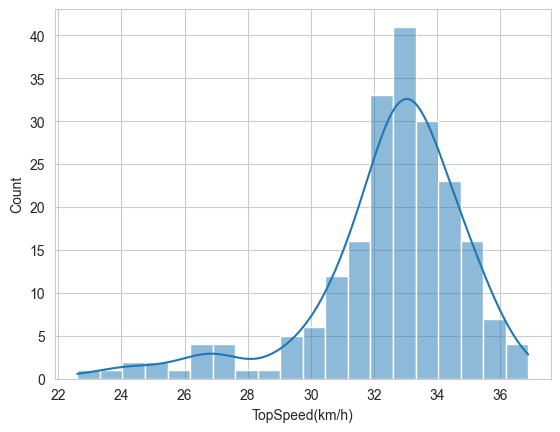

In [123]:
sns.histplot(ucl['TopSpeed(km/h)'], bins=20, kde=True)

In [124]:
fig = px.histogram(ucl, x='TopSpeed(km/h)', nbins=20, title='Histogram of Top Speed',color_discrete_sequence=['blue'])
fig.show()

#### 16 (Scatter Plot). Scatter Plot of Goals vs Minutes Played

<Axes: xlabel='Minutes_played', ylabel='Goals'>

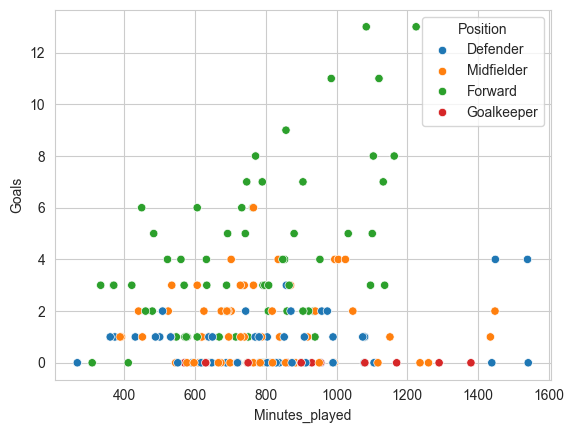

In [125]:
sns.scatterplot(x='Minutes_played', y='Goals', hue='Position', data=ucl)

In [126]:
px.scatter(ucl, x='Minutes_played', y='Goals', color='Position', title='Goals vs Minutes Played by Player Position', hover_data=['Player', 'Team'])

#### 17 (Bar chart). Top MOTM Awards Winners in Champions League 2025


In [127]:
top_motm_rating = ucl[['Player', 'Team', 'MOTM_Awards','Rating']].sort_values(by='MOTM_Awards', ascending=False).head(10)

In [129]:
px.bar(top_motm_rating, x='Player', y='MOTM_Awards', color='MOTM_Awards', title='Top MOTM Awards Winners', text='Rating', hover_name='Team')

#### 18. (Bar Chart). Top 15 Nationalities of Players in Champions League 2025

In [130]:
names_nationality = list(dict(ucl['Nationality'].value_counts()).keys())[:15]
values_nationality = ucl['Nationality'].value_counts().tolist()[:15]

In [131]:
names_nationality

['France',
 'Netherlands',
 'Germany',
 'Spain',
 'Brazil',
 'Italy',
 'England',
 'Argentina',
 'Belgium',
 'Portugal',
 'Switzerland',
 'Turkey',
 'Norway',
 'Croatia',
 'Morocco']

In [132]:
values_nationality

[24, 18, 16, 16, 15, 11, 11, 10, 9, 9, 6, 5, 4, 4, 3]

In [135]:
fig = go.Bar(x = names_nationality,
            y = values_nationality,
            marker = dict(color = 'rgba(255, 0, 0, 0.5)',
                         line=dict(color='rgb(0,0,1)',width=1.5)),
            text = names_nationality)

layout = go.Layout()
fig = go.Figure(data = fig, layout = layout)
fig.update_layout(title_text='Top 15 Nationalities of Players in Champions League 2025 Season')
fig.show()

#### 19 (Bar Chart). All competitions by number of players (210 players) in the 2025 Champions League season

In [142]:
ucl['Competitions'].unique()

array(['Serie A', 'La Liga', 'Premier League', 'Pro League',
       'Liga Portugal', 'Premiership', 'Ligue 1', 'Eredivisie',
       'Bundesliga', 'ABundesliga', 'Premier Liga', 'SuperSport HNL'],
      dtype=object)

In [143]:
names_Competitions = list(dict(ucl['Competitions'].value_counts()).keys())
values_Competitions = ucl['Competitions'].value_counts().tolist()

In [144]:
fig = go.Bar(x = names_Competitions,
             y = values_Competitions,
             marker = dict(color = 'rgba(0, 0, 255, 0.5)',
                         line=dict(color='rgb(0,0,50)',width=1.5)),
             )
layout = go.Layout()
fig = go.Figure(data = fig, layout = layout)
fig.update_layout(title_text='All competitions by number of players (210 players) in the 2025 Champions League season')
fig.show()

#### 20 (Bar Chart). Top 12 Players by Passes Completed

In [145]:
ucl_top_passes = ucl[['Player','Passes_completed','Team']].sort_values(by='Passes_completed', ascending=False).head(12)

In [146]:
px.bar(ucl_top_passes, x='Player', y='Passes_completed', color='Passes_completed', title='Top 12 Players by Passes Completed', text='Team', hover_name='Team')

#### 21 (Bubble Chart). Best Goalkeepers in Champions League 2025 Season

In [147]:
goalkeepers = ucl[ucl['Position'] == 'Goalkeeper']
top_saves = goalkeepers.sort_values('Saves', ascending=False).head(10)

In [148]:
fig = px.scatter(
    top_saves,
    x='Saves',
    y='Clean_Sheets',
    size='Minutes_played',
    color='Player',
    size_max=25,
    hover_name='Team',
    title='Goalkeepers: Saves vs Clean Sheets'
)
fig.show()

In [149]:
goalkeepers['Gk_Level'] = (
    goalkeepers['Saves'] * 1.5 +
    goalkeepers['Clean_Sheets'] * 4 -
    goalkeepers['Goals_Conceded'] * 1.2
)

best_gks = goalkeepers.sort_values('Gk_Level', ascending=False).head(10)

C:\Users\arber\AppData\Local\Temp\ipykernel_23036\1610042829.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [150]:
best_gks[['Player','Age', 'Team', 'Saves', 'Clean_Sheets', 'Goals_Conceded', 'Gk_Level']].head(10)

,Player,Age,Team,Saves,Clean_Sheets,Goals_Conceded,Gk_Level
112,Yann Sommer,36,Inter,54,7,16,89.8
160,Emiliano Martinez,30,Aston Villa,50,5,12,80.6
110,Donnarumma,26,Paris SG,39,6,14,65.7
58,David Raya,29,Arsenal FC,32,6,9,61.2
33,Courtois,32,Real Madrid,52,1,18,60.4
196,Schmeichel,38,Celtic,41,3,17,53.1
52,Alisson Becker,32,Liverpool FC,24,3,3,44.4
126,Riznyk,26,Shakhtar Donetsk,37,2,16,44.3
42,Mike Maignan,29,Milan,36,1,12,43.6
172,Mignolet,37,Club Brugge,36,3,19,43.2


In [151]:
fig = px.bar(
    best_gks[['Player', 'Gk_Level', 'Team']],
    x= 'Player',
    y='Gk_Level',
    color='Team',
    title='Best Goalkeepers in Champions League 2025',
    text='Gk_Level'
)
fig.show()

#### 22 (Bar Chart). Aggresive Players in Champions League 2025

In [152]:
aggresive_players_scouting =  ucl[(ucl['Balls_recovered'] > 30) & (ucl['Tackles_Won'] > 12) & (ucl['Age']< 25)]

In [153]:
aggresive_players_scouting[['Player','Position','Age','Balls_recovered','Tackles_Won']]

,Player,Position,Age,Balls_recovered,Tackles_Won
43,Ryan Flamingo,Defender,22,49,16
97,Jurrien Timber,Defender,23,44,15
129,Nuno Mendes,Defender,22,87,23
147,Casado,Midfielder,21,40,20
175,Joao Neves,Midfielder,20,87,19


In [154]:
px.bar(aggresive_players_scouting, x='Player', y='Value10^6', color='Team',text='Age', title='Aggresive Players in Champions League 2025', hover_name='Team')

#### 23 (Bar Chart). Top 15 Highest Value Players in Champions League 2025

In [161]:
top_12_values  = ucl.nlargest(12, 'Value10^6')[['Player','Age','Team','Value10^6']].head(12)

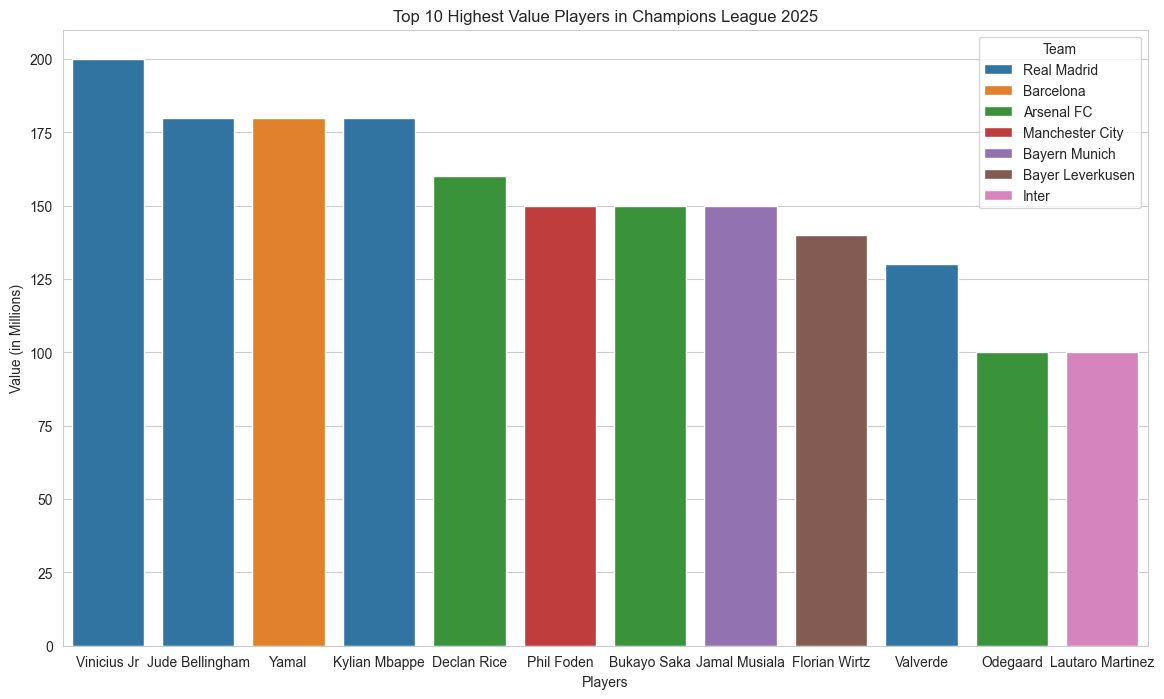

In [162]:
plt.figure(figsize=(14,8))
sns.barplot(x=top_12_values['Player'], y=top_12_values['Value10^6'], hue=top_12_values['Team'])
plt.title('Top 10 Highest Value Players in Champions League 2025')
plt.ylabel('Value (in Millions)')
plt.xlabel('Players')
plt.show()

#### 24. Players attempting more than 34 and Goals per Attempt

In [163]:
attempting_players = ucl[ucl['Total_attempts'] > 34]
ucl['Goals_per_attempt'] = ucl['Goals'] / ucl['Total_attempts']

In [171]:
ucl[['Player','Age', 'Goals_per_attempt', 'Total_attempts', 'Goals']].sort_values(by='Goals', ascending=False).head(15)

,Player,Age,Goals_per_attempt,Total_attempts,Goals
3,Raphinha,28,0.250000,52,13
134,Guirassy,29,0.325000,40,13
144,Harry Kane,31,0.224490,49,11
2,Lewandowski,36,0.323529,34,11
60,Lautaro Martinez,27,0.391304,23,9
37,Vinicius Jr,24,0.190476,42,8
75,Dembele,27,0.125000,64,8
176,Haaland,24,0.210526,38,8
51,Pavlidis,26,0.225806,31,7
19,Kylian Mbappe,25,0.137255,51,7


#### 25. Players with most matches played

In [182]:
ucl.groupby(['Player','Team'])['Match_played'].sum().sort_values(ascending=False).head(15)

Player            Team        
Barcola           Paris SG        17
Hakimi            Paris SG        17
Fabian Ruiz       Paris SG        17
Vitinha           Paris SG        17
Pacho             Paris SG        17
Joao Neves        Paris SG        17
Marquinhos        Paris SG        16
Desire Doue       Paris SG        16
Nuno Mendes       Paris SG        16
Dembele           Paris SG        15
Kylian Mbappe     Real Madrid     14
Lautaro Martinez  Inter           14
Modric            Real Madrid     14
Gittens           BVB Dortmund    14
Guirassy          BVB Dortmund    14
Name: Match_played, dtype: int64

#### 26. Top 10 Players with Most Assists & Top 10 Players with Most Goals

In [190]:
top_assists = ucl[ucl['Assists'] > 0].sort_values('Assists', ascending=False).head(10)

In [191]:
top_assists

,PlayerID,Player,Position,Age,Nationality,Team,Competitions,Phase,Phase_Tier,Value10^6,...,Tackles_Won,Tackles_Lost,Saves,Goals_Conceded,Clean_Sheets,MOTM_Awards,Minutes_played,Match_played,DNP,Goals_per_attempt
3,4,Raphinha,Forward,28,Brazil,Barcelona,La Liga,Semi_finals,A,80.0,...,2,7,0,0,0,3,1225,14,0,0.250000
75,76,Dembele,Forward,27,France,Paris SG,Ligue 1,Final,S,75.0,...,1,5,0,0,0,2,1163,15,2,0.125000
159,160,Kimmich,Midfielder,29,Germany,Bayern Munich,Bundesliga,Quarter_finals,B,50.0,...,8,8,0,0,0,0,1260,14,0,0.000000
114,115,Zappacosta,Midfielder,32,Italy,Atalanta BC,Serie A,Knockout_phase,D,7.0,...,1,3,0,0,0,0,699,9,1,0.000000
12,13,Hakimi,Defender,26,Morocco,Paris SG,Ligue 1,Final,S,60.0,...,11,15,0,0,0,2,1540,17,0,0.111111
49,50,Charles Ketelaere,Midfielder,24,Belgium,Atalanta BC,Serie A,Knockout_phase,D,38.0,...,1,6,0,0,0,1,702,10,0,0.235294
150,151,Julian Brandt,Midfielder,29,Germany,BVB Dortmund,Bundesliga,Quarter_finals,B,25.0,...,3,8,0,0,0,0,884,13,1,0.000000
93,94,Desire Doue,Forward,19,France,Paris SG,Ligue 1,Final,S,60.0,...,5,9,0,0,0,1,742,16,1,0.156250
180,181,Fermin Lopez,Midfielder,22,Spain,Barcelona,La Liga,Semi_finals,A,50.0,...,5,7,0,0,0,0,451,11,3,0.062500
20,21,Frimpong,Defender,24,Netherlands,Bayer Leverkusen,Bundesliga,Round16,C,50.0,...,1,5,0,0,0,0,796,10,0,0.000000


In [192]:
#  Qitu kemi Kriju  kolonen me emrin dhe ekipin per afishim te ngjashem
top_assists['Label'] = top_assists['Player'] + " (" + top_assists['Team'] + ")"

In [197]:
fig = px.bar(
    top_assists,
    x='Assists',
    y='Label',
    orientation='h',
    color='Player',
    title='Top 10 Players with Most Assists in Champions League 2025',
    text='Assists'
)

fig.update_layout(yaxis=dict(autorange="reversed"))  # qe lojtari me ma shum gola te jete me nelt
fig.update_traces(textposition='outside')
fig.show()

In [198]:
top_goals = ucl[ucl['Goals'] > 0].sort_values('Goals', ascending=False).head(10)

In [199]:
top_goals['Label'] = top_goals['Player'] + " (" + top_goals['Team'] + ")"

In [203]:
fig = px.bar(
    top_goals,
    x='Goals',
    y='Label',
    orientation='h',
    color='Player',
    title='Top 10 Players with Most Goals in Champions League 2025',
    text='Goals'
)

fig.update_layout(yaxis=dict(autorange="reversed"))
fig.update_traces(textposition='outside')
fig.show()

In [204]:
efficient_players = ucl[ucl['Match_played'] >= 5].copy()
efficient_players['G_A_per_game'] = (efficient_players['Goals'] + efficient_players['Assists']) / efficient_players['Match_played']

In [207]:
top_eff = efficient_players.sort_values('G_A_per_game', ascending=False).head(10)
top_eff['Label'] = top_eff['Player'] + " (" + top_eff['Team'] + ")"

In [209]:
fig = px.bar(
    top_eff,
    x='G_A_per_game',
    y='Label',
    orientation='h',
    color='Team',
    title='Top 6 Lojtaret me Efikas ne Champions League (Goal+Assist per Ndeshje)',
    text=top_eff['G_A_per_game'].round(2)
)

fig.update_layout(yaxis=dict(autorange='reversed'))
fig.update_traces(textposition='outside')
fig.show()

#### 27. Top 20 Teams with Most Attacks based in Assists, Dribbles and Total Attempts

In [211]:
team_attack = ucl.groupby('Team')[['Assists', 'Dribbles', 'Total_attempts']].sum().reset_index()

,Team,Assists,Dribbles,Total_attempts
0,Arsenal FC,15,151,128
1,Aston Villa,12,125,75
2,Atalanta BC,17,104,105
3,Atletico Madrid,14,55,83
4,BVB Dortmund,17,161,144
5,Barcelona,31,273,202
6,Bayer Leverkusen,9,88,91
7,Bayern Munich,17,166,194
8,Benfica,11,104,123
9,Bologna,1,33,24


In [212]:
team_attack['Attack_Score'] = (team_attack['Assists'] + team_attack['Dribbles'] + team_attack['Total_attempts'])

In [240]:
# Merr top 25 skuadrat më sulmuese
top_attack_team = team_attack.sort_values('Attack_Score', ascending=False).head(20)

In [241]:
top_attack_team

,Team,Assists,Dribbles,Total_attempts,Attack_Score
25,Paris SG,31,319,279,629
5,Barcelona,31,273,202,506
26,Real Madrid,18,238,181,437
7,Bayern Munich,17,166,194,377
4,BVB Dortmund,17,161,144,322
24,PSV Eindhoven,12,133,157,302
0,Arsenal FC,15,151,128,294
16,Inter,17,119,138,274
8,Benfica,11,104,123,238
2,Atalanta BC,17,104,105,226


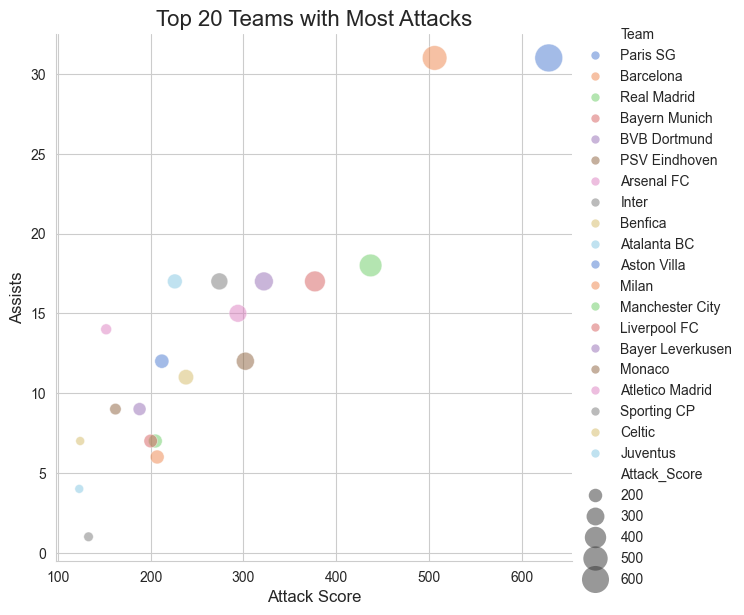

In [249]:
sns.relplot(data=top_attack_team, x='Attack_Score', y='Assists', size='Attack_Score', hue='Team',sizes=(40,400),alpha=.5, palette="muted", height=6)

plt.title('Top 20 Teams with Most Attacks', fontsize=16)
plt.xlabel('Attack Score', fontsize=12)
plt.ylabel('Assists', fontsize=12)
plt.show()

In [252]:
#### Done with Univariate and Bivariate Analysis